<a href="https://colab.research.google.com/github/dimLMT/Prediction-of-Product-Sales/blob/main/Copy_of_Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
- Author: Mengtian Liu


## Project Overview
- sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

## Load and Inspect Data

- Use Pandas to read the sales prediction data set into Google Colab.
  
- Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.


In [22]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')
#load file
import numpy as np
import pandas as pd

fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(fpath)
df.info()
print('\n\n')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data
- Explore the data - what do you need to do to clean this data? Clean it!
- Be sure to address each of the following tasks:

1) How many rows and columns?

2) What are the datatypes of each variable?

In [23]:
df.shape

(8523, 12)

In [24]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

In [25]:
df.duplicated().sum()

0

In [26]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5) Address the missing values by using a placeholder value.

6) Confirm that there are no missing values after addressing them.

In [27]:
df['Item_Weight'] = df['Item_Weight'].fillna(-1)

In [28]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('MISSING')

In [29]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).


In [30]:
cat_cols = df.select_dtypes('object').columns
for cols in cat_cols:
  print(df[cols].value_counts(),'\n')

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64 

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64 

Mediu

In [31]:
consis_dict = {'LF':'Low Fat', 'reg': 'Regular', 'low fat':'Low Fat'}
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(consis_dict)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [32]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


 The **Item_Weight** column already has -1 placeholder values



## Exploratory Data Analysis

Next task is to create exploratory visuals that might help you understand, explain, or model your data. This must include at least one of each:

- Histograms to view the distributions of numerical features in your dataset.

- Boxplots to view statistical summaries of numerical features in your dataset.

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
num_cols = df.select_dtypes('number').columns
len(num_cols)

5

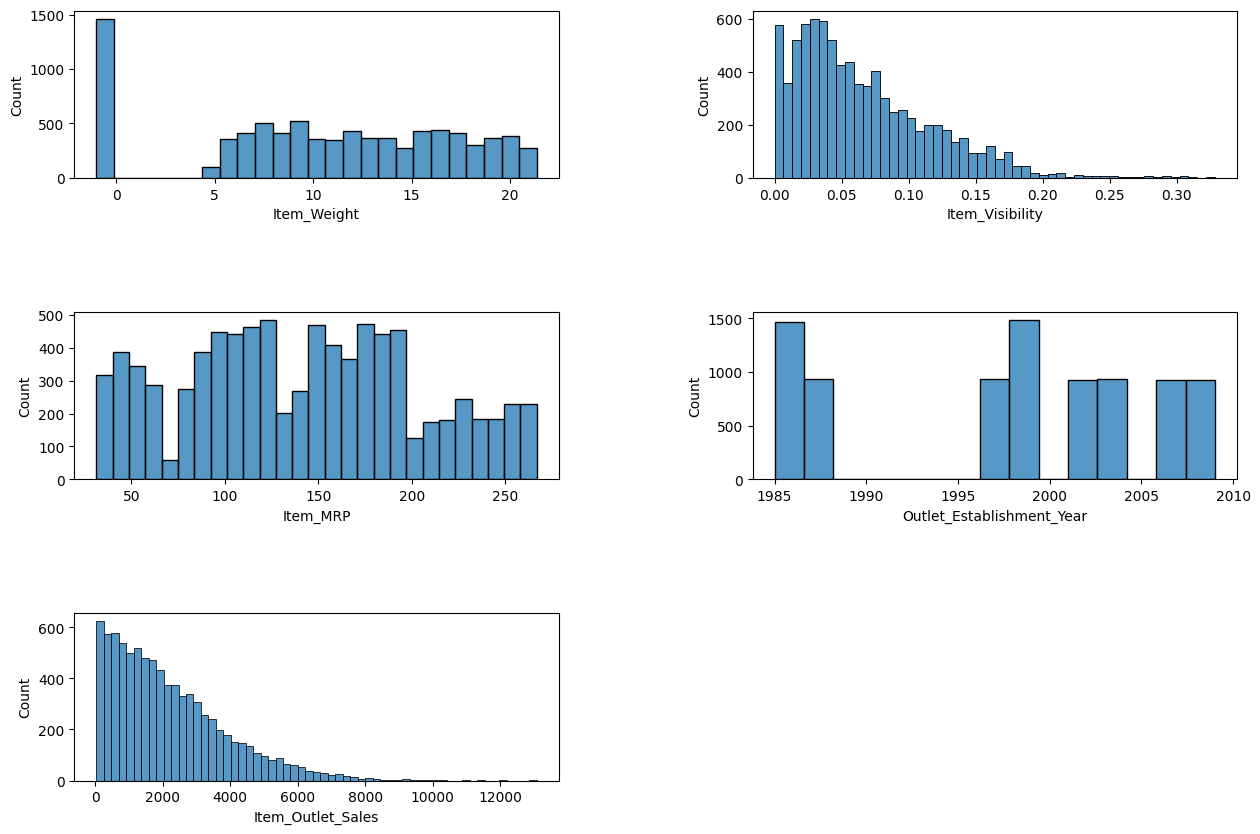

In [34]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.8)
for n, col in enumerate(num_cols):
  ax = plt.subplot(3, 2, n + 1)
  ax = sns.histplot(data=df, x=col);


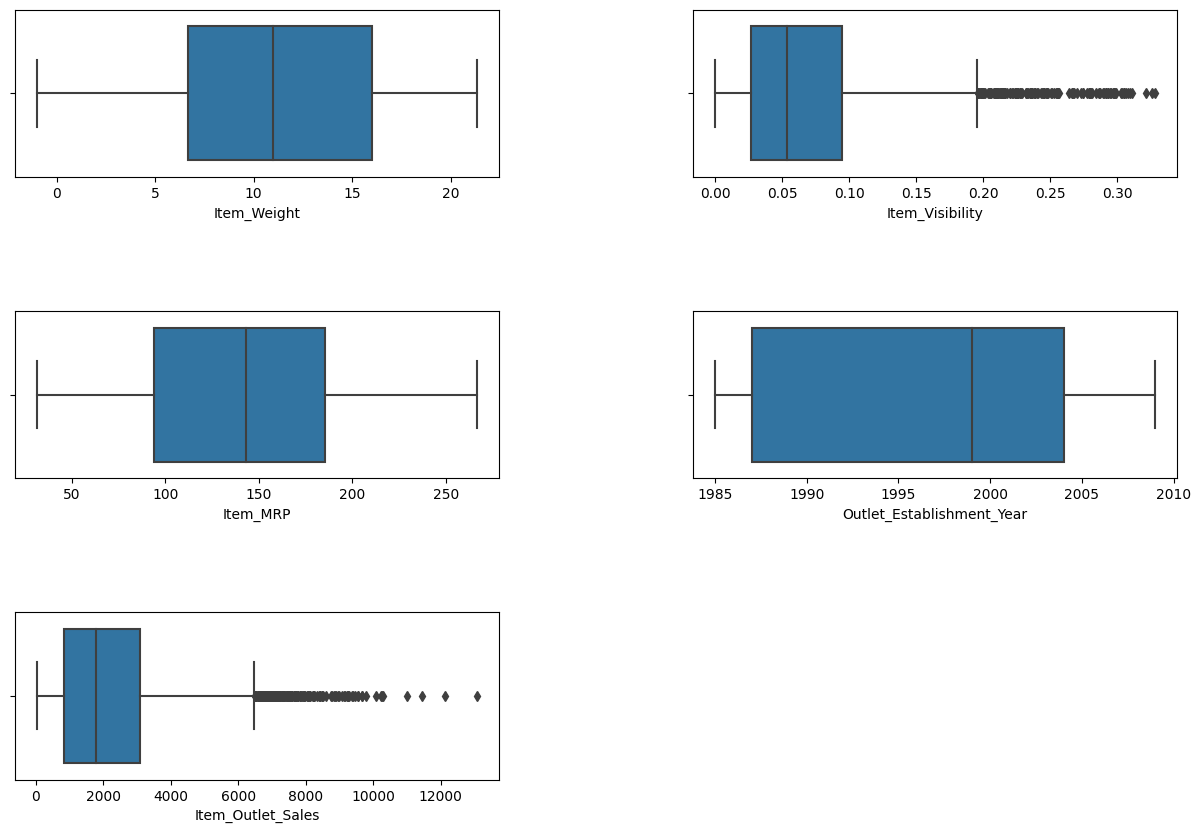

In [35]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.8)
for n, col in enumerate(num_cols):
  ax = plt.subplot(3, 2, n + 1)
  ax = sns.boxplot(data=df, x=col);


- Countplots to view the frequency of each class of categorial features in your dataset.

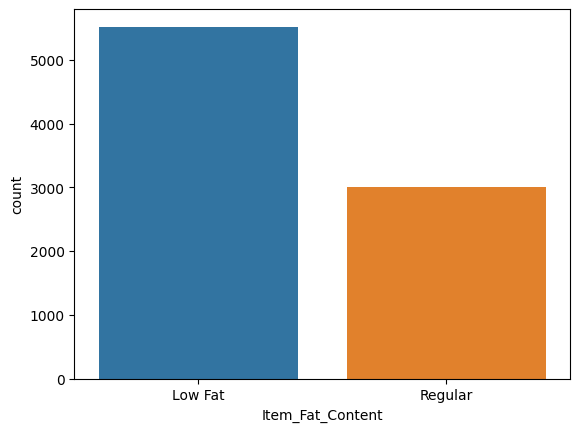

In [42]:
ax1 = sns.countplot(data=df, x='Item_Fat_Content')

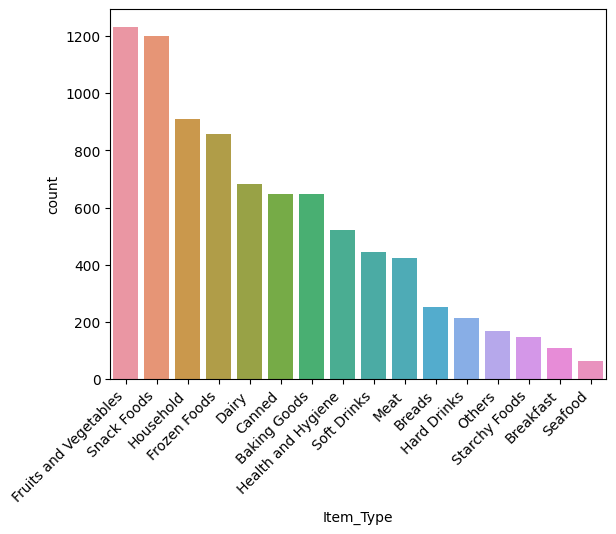

In [43]:
reorder_tick = df['Item_Type'].value_counts().index
ax2 = sns.countplot(data=df, x='Item_Type', order=reorder_tick)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right');

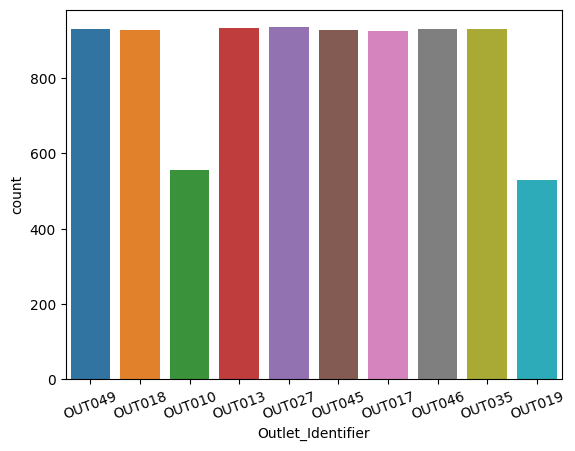

In [44]:
ax3 = sns.countplot(data=df, x='Outlet_Identifier')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=20);

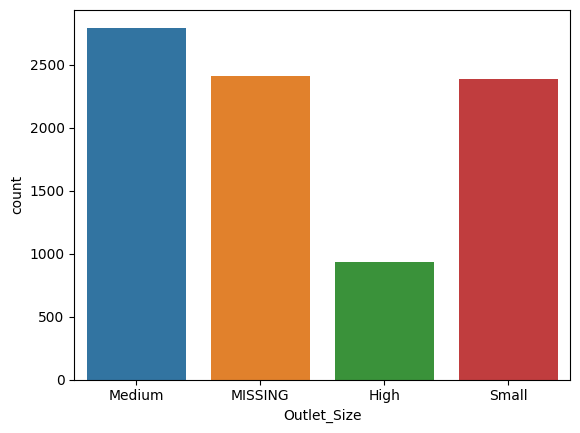

In [45]:
ax4 = sns.countplot(data=df,x='Outlet_Size')

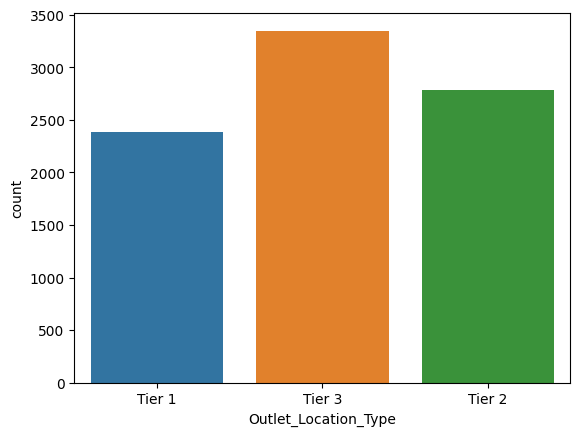

In [46]:
ax5 = sns.countplot(data=df,x='Outlet_Location_Type')

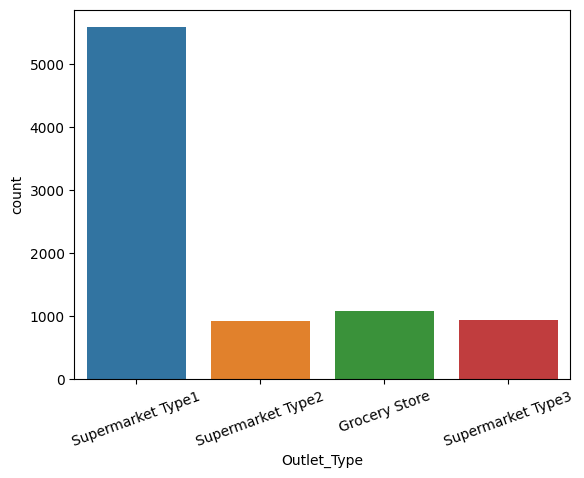

In [47]:
ax6 = sns.countplot(data=df, x='Outlet_Type')
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=20);

- Heatmap to view the correlation between features.

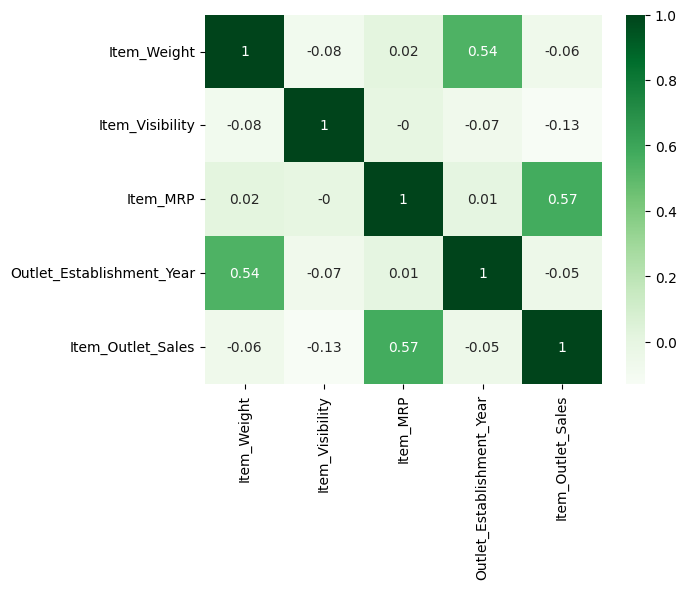

In [49]:
corr = df.corr(numeric_only=True).round(2)
ax = sns.heatmap(corr, cmap='Greens', annot=True);

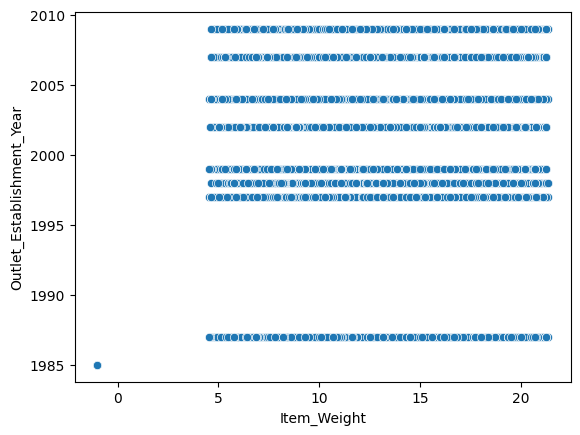

In [51]:
ax = sns.scatterplot(data=df, y='Outlet_Establishment_Year', x='Item_Weight')

The **Item_Weight** has placeholder values of -1 for the year 1985. Otherwise, there should be no correlation.

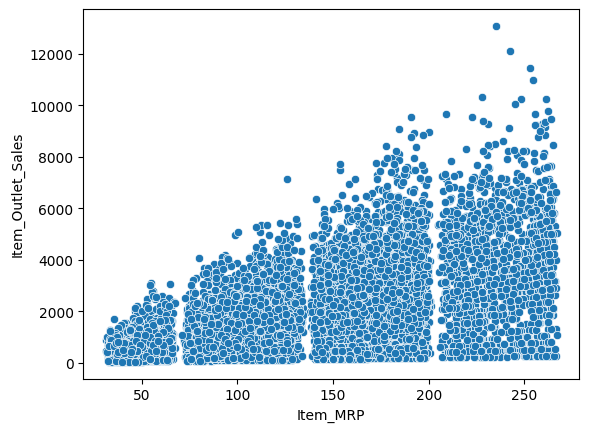

In [52]:
ax = sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales')

Start updating the README file associated with the project.

Add text describing the project.

Select two key visuals of different types that demonstrate a relevant insight into the data.

Add text with a brief (1 sentence is sufficient) interpretation of the visuals you include.

## Feature Inspection
